In [4]:
from torch import nn
import torch
import copy
import os
import random
import numpy as np
from torchvision import datasets, transforms

In [2]:
writer_dic = {}
writer_dic['wi'] = 10
writer_dic

{'wi': 10}

In [4]:
x = "123456_local"
x[-5:]

'local'

In [3]:
train_dataset = datasets.EMNIST('./data', split="digits", train=True, download=True,
                                   transform=transforms.Compose([
                                       transforms.RandomCrop(28, padding=2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                   ]))

test_dataset = datasets.EMNIST('./data', split="digits", train=False, download=True,
                                   transform=transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                   ]))

In [3]:
train_dataset
# Dataset EMNIST
#     Number of datapoints: 240000
#     Root location: ./data
#     Split: Train
#     StandardTransform
# Transform: Compose(
#                RandomCrop(size=(28, 28), padding=2)
#                ToTensor()
#                Normalize(mean=(0.1307,), std=(0.3081,))
#            )

Dataset EMNIST
    Number of datapoints: 240000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(28, 28), padding=2)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [20]:
test_dataset
# Dataset EMNIST
#     Number of datapoints: 40000
#     Root location: ./data
#     Split: Test
#     StandardTransform
# Transform: Compose(
#                ToTensor()
#                Normalize(mean=(0.1307,), std=(0.3081,))
#            )

Dataset EMNIST
    Number of datapoints: 40000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [7]:
x = torch.randn(2,2, 3)
x
torch.cat((x, x, x), 0)
torch.cat((x, x, x), 2)

tensor([[[-0.5234, -0.7344,  1.3374, -0.5234, -0.7344,  1.3374, -0.5234,
          -0.7344,  1.3374],
         [-0.4120,  2.4138, -0.1016, -0.4120,  2.4138, -0.1016, -0.4120,
           2.4138, -0.1016]],

        [[ 0.1074,  0.3094, -0.4569,  0.1074,  0.3094, -0.4569,  0.1074,
           0.3094, -0.4569],
         [ 0.5739, -1.0226, -1.1109,  0.5739, -1.0226, -1.1109,  0.5739,
          -1.0226, -1.1109]]])

tensor([0, 9, 7, 9, 2, 2, 3, 1, 0, 0, 6, 4, 9, 3, 8, 2, 0, 8, 2, 0, 5, 4, 9, 8,
        0, 6, 1, 8, 3, 7, 9, 9, 6, 3, 7, 5, 7, 3, 1, 9, 5, 8, 5, 4, 6, 2, 9, 6,
        3, 6, 2, 1, 0, 1, 5, 8, 4, 3, 0, 0, 7, 3, 7, 5])
torch.Size([64])


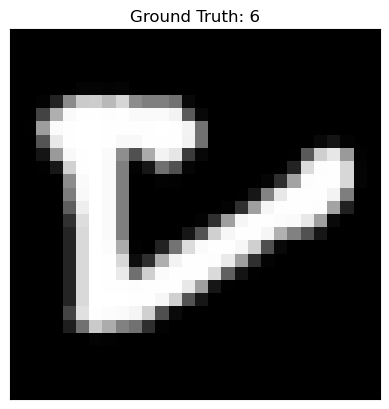

In [15]:
from torch.utils.data import DataLoader

batch_size = 64
# 读取测试数据，train=True读取训练数据；train=False读取测试数据
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

examples = enumerate(test_loader) #img&label
batch_idx, (imgs, labels) = next(examples) #读取数据,batch_idx从0开始

print(labels) #读取标签数据
print(labels.shape) #torch.Size([32])，因为batch_size为32

#-------------------------------数据显示--------------------------------------------
#显示6张图片
import matplotlib.pyplot as plt
fig = plt.figure()
plt.tight_layout()
plt.imshow(imgs[40][0], cmap='gray', interpolation='none')#子显示
plt.title("Ground Truth: {}".format(labels[10])) #显示title
plt.xticks([])
plt.yticks([])
plt.show()


0.3%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])
torch.Size([32])


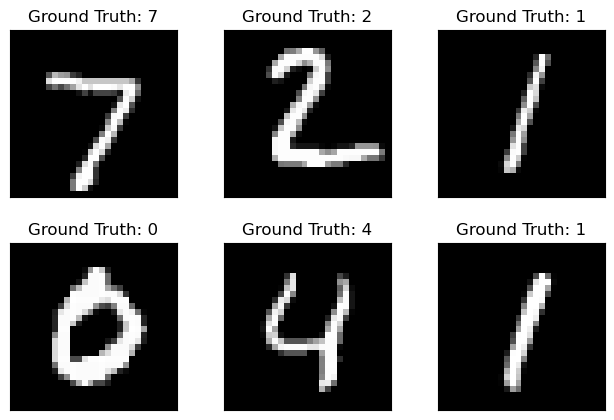

In [5]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

batch_size = 32
# 读取测试数据，train=True读取训练数据；train=False读取测试数据
train_dataset = datasets.MNIST(root='./data', train=True, transform=data_tf, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=data_tf)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

examples = enumerate(test_loader) #img&label
batch_idx, (imgs, labels) = next(examples) #读取数据,batch_idx从0开始

print(labels) #读取标签数据
print(labels.shape) #torch.Size([32])，因为batch_size为32

#-------------------------------数据显示--------------------------------------------
#显示6张图片
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.tight_layout()
  plt.imshow(imgs[i][0], cmap='gray', interpolation='none')#子显示
  plt.title("Ground Truth: {}".format(labels[i])) #显示title
  plt.xticks([])
  plt.yticks([])

plt.show()
